#         Plot cross section comparisons of the model and aircraft data



## Setup imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import notebook_prepare as pre

## Define plotting function

In [5]:
def plot_cross_sections(df,plotdir,key,label,column,model) :
    # Define the figure.
    fig = plt.figure(figsize=(15,15))
    ax  = plt.axes([.2,.05,.75,.8])

    # Define the data.
    time_data = df.index
    alt_data = df['Altitude'][:]
    data = pre.read_data_values(df, model)

    if(model):    
        # Calculate the minimum and maximum limits.
        min = np.nanmin([np.nanmin(data['a_avg']),np.nanmin(column['data'])])
        max = np.nanmax([np.nanmax(data['a_avg']),np.nanmax(column['data'])])
    
        # Plot the model data.
        plt.pcolormesh(column['time'],column['alt'],column['data'],zorder=1,cmap=plt.cm.Spectral_r,vmin=min,vmax=max,shading='auto')
            
        # Plot the boundary layer height.
        plt.plot(time_data,data['bl_avg'],lw=2,ls='dashed',c='black',zorder=3,label='Modelled Boundary Layer Height')

        # Add a legend.
        plt.legend(fontsize=30,markerscale=2)
        
    else:
        min = np.nanmin(data['a_avg'])
        max = np.nanmax(data['a_avg']) 
        
    # Plot the aircraft data.
    plt.scatter(time_data,alt_data,s=50,c=data['a_avg'],cmap=plt.cm.Spectral_r,edgecolors='black',zorder=2,vmin=min,vmax=max)

    # Plot the colourbar.
    cb = plt.colorbar(ax=ax,orientation='horizontal',shrink=0.8,pad=0.25,extend='both')
    cb.ax.tick_params(labelsize=30)
    cb.set_label(label,fontsize=30,labelpad=10)

    # Set the axes ticks.
    time_ticks,time_labels = pre.calculate_time_markers(time_data)
    plt.xticks(time_ticks,rotation=45)
    ax.set_xticklabels(time_labels)
    ax.tick_params(labelsize=30)

    # Set the axes labels.
    plt.xlabel('Time / UTC',fontsize=50,labelpad=10)
    plt.ylabel('Altitude / m',fontsize=50,labelpad=10)

    plt.show() #SLOW HERE

## Specify the flight number & model data

In [8]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M270'  

# Specify whether you have model data to plot.
model = False

## Prepare the data and plot for each pollution species

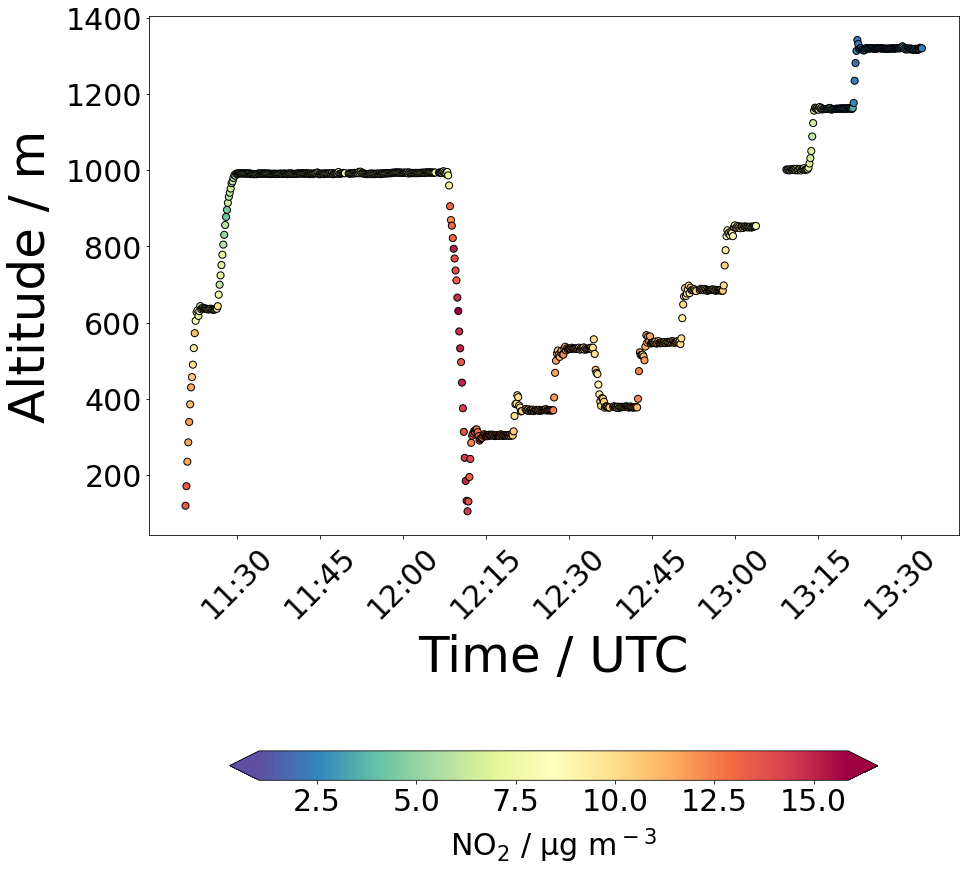

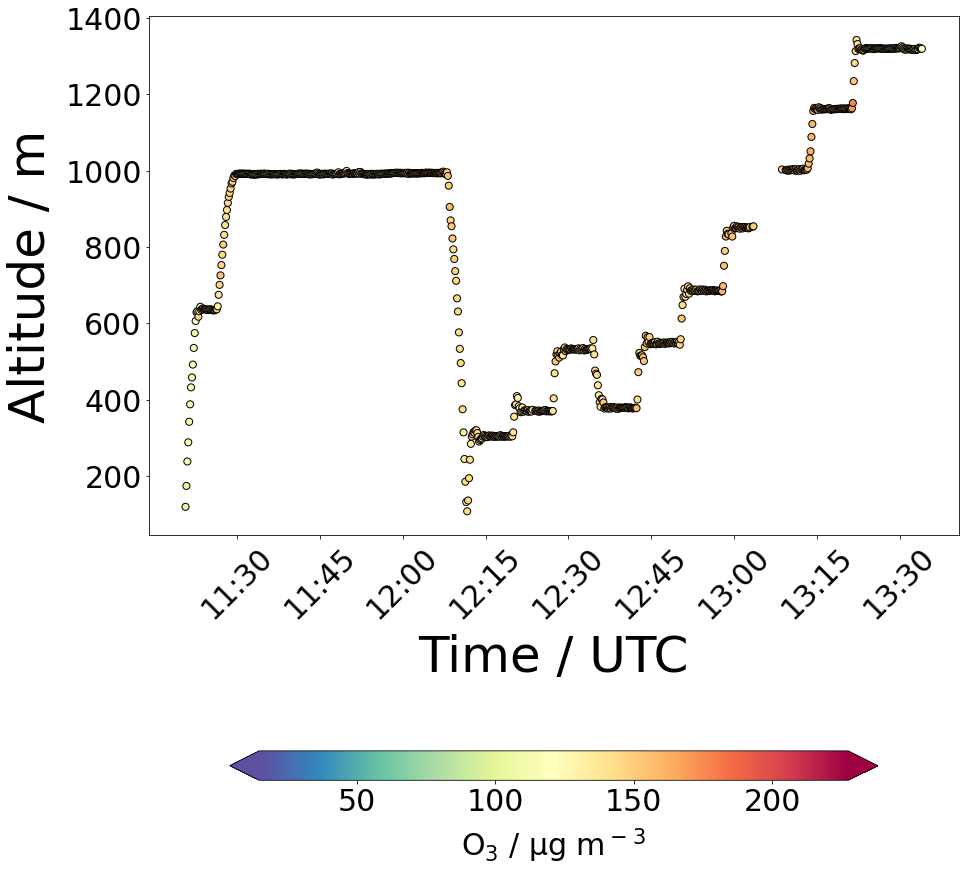

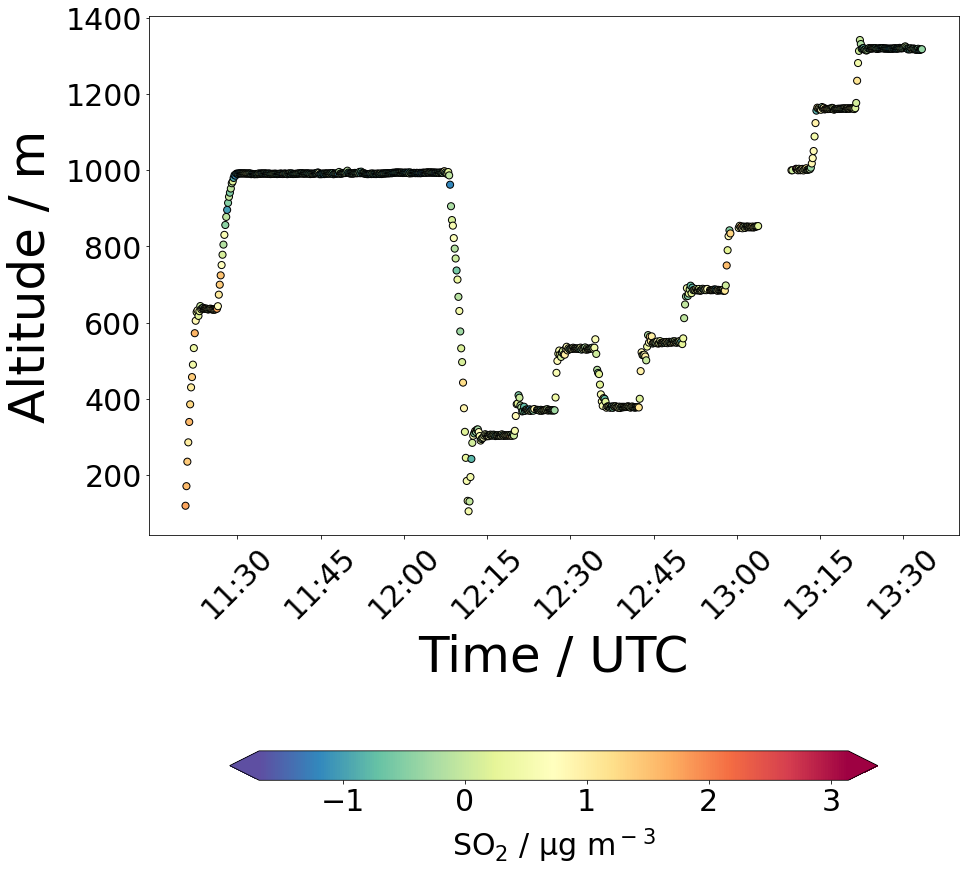

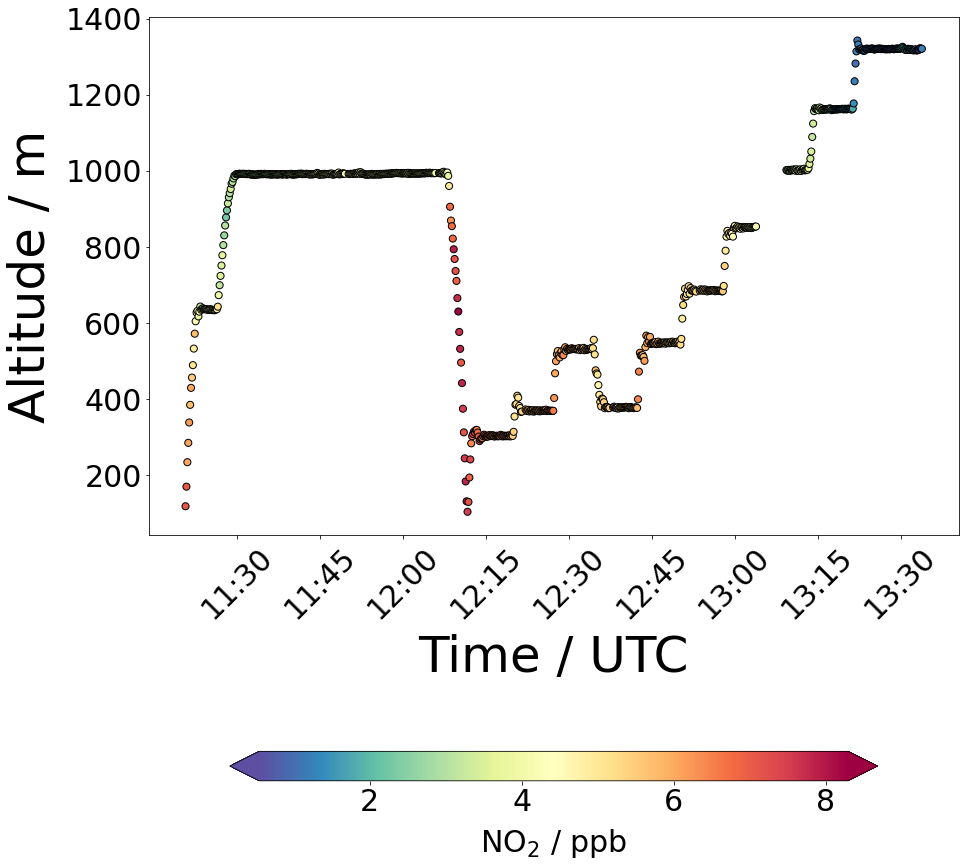

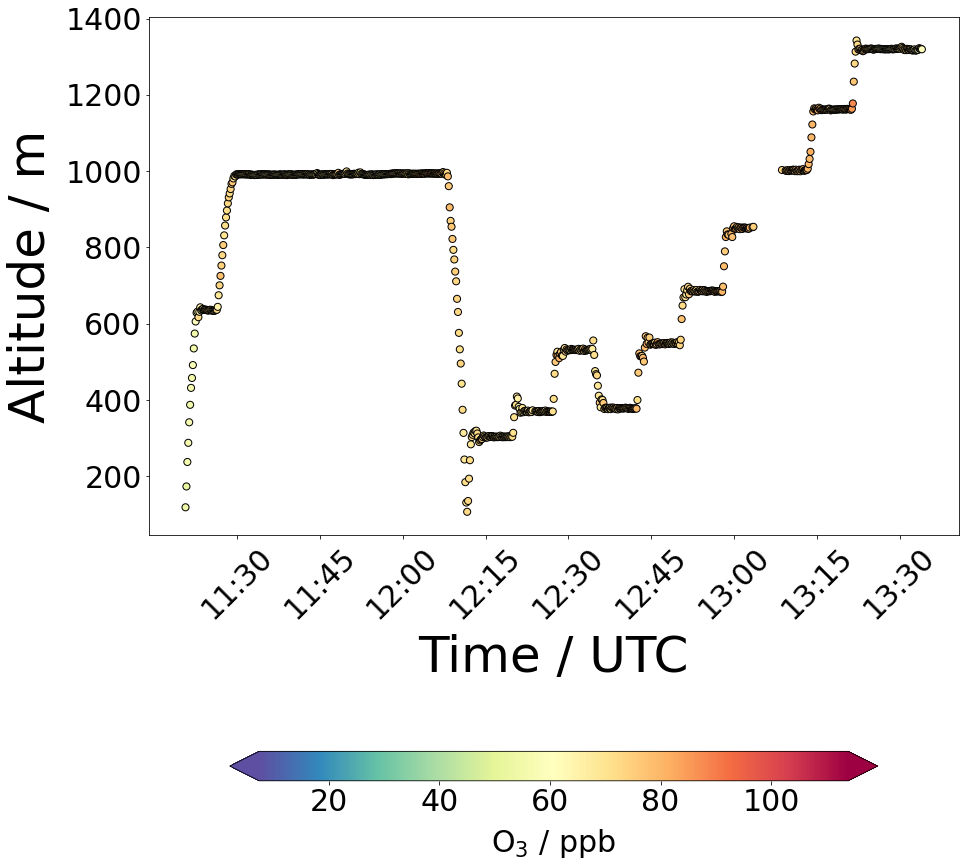

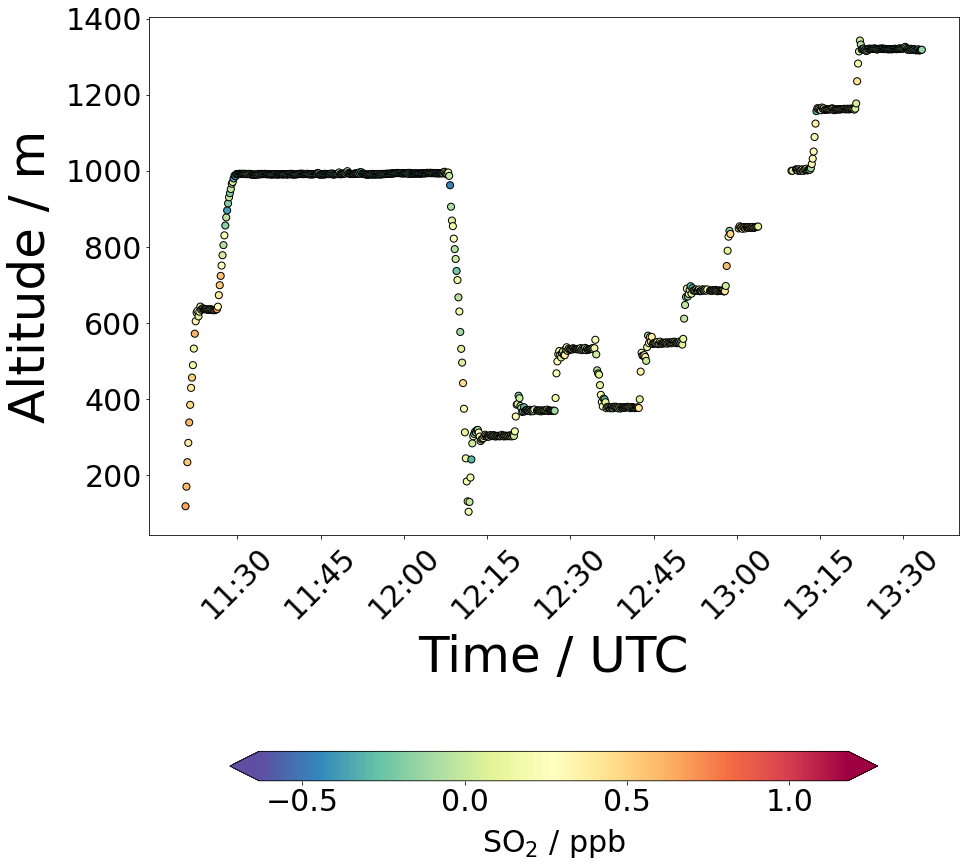

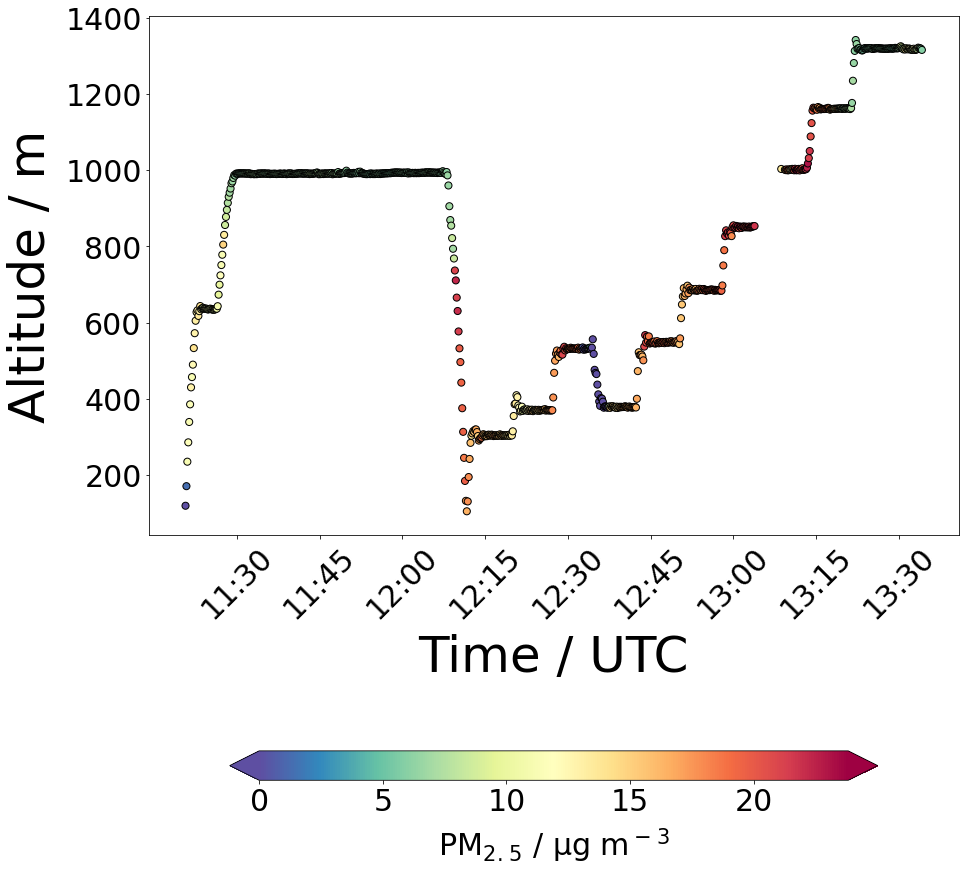

In [9]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'], model)
    

        # Read the cross section data.
    if(model):
        column = pre.read_cross_section(setup[6],setup[7],column_key,unit_conv,setup[0],setup[1],setup[2],setup[8])
    else: column = None

    plot_cross_sections(resample_df,setup[5],key,label,column,model)